In [15]:
# Import
from azure.storage.blob import BlobServiceClient
from pydicom import dcmread
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [33]:
# Load blobs
try:
    with open('/home/andrew/ITRI-LungCancer/keys.txt', 'r') as file:
        data = file.read().splitlines()
        account_name    = data[0]
        account_key     = data[1]
        container_name  = data[2]
    
    blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=account_key)
    container_client = blob_service_client.get_container_client(container_name)
    blob_name_list = container_client.list_blob_names()
    
except Exception as ex:
    print('Exception:')
    print(ex)

In [34]:
def extract_all_dicom_info(ds):
    # Extract all available DICOM metadata into a dictionary
    dicom_info = {}
    for element in ds:
        if element.VR != 'SQ':  # Skip sequences to avoid deep nested structures
            dicom_info[element.name] = element.value
        else:
            dicom_info[element.name] = 'Sequence'
    
    return dicom_info

In [35]:
try:
    data = []
    for i in range(1000):
        for j in range(200):
            blob_name = next(blob_name_list)
        print(i, blob_name)
        blob_client = container_client.get_blob_client(blob_name)
        blob_data = blob_client.download_blob().readall()
        blob_stream = BytesIO(blob_data)
        ds = dcmread(blob_stream)
        info = extract_all_dicom_info(ds)
        data.append(info)
except Exception as ex:
    print('Exception:')
    print(ex)

0 LIDC-IDRI-0002/01-01-2000-NA-NA-98329/3000522.000000-NA-04919/1-067.dcm
1 LIDC-IDRI-0003/01-01-2000-NA-NA-94866/3000611.000000-NA-03264/1-006.dcm
2 LIDC-IDRI-0004/01-01-2000-NA-NA-91780/3000534.000000-NA-58228/1-066.dcm
3 LIDC-IDRI-0005/01-01-2000-NA-NA-42125/3000548.000000-NA-86225/1-025.dcm
4 LIDC-IDRI-0006/01-01-2000-NA-NA-92500/3000556.000000-NA-20957/1-092.dcm
5 LIDC-IDRI-0008/01-01-2000-NA-NA-30141/3000549.000000-NA-21954/1-014.dcm
6 LIDC-IDRI-0009/01-01-2000-NA-NA-07045/3000538.000000-NA-29210/1-081.dcm
7 LIDC-IDRI-0010/01-01-2000-NA-NA-43375/3000518.000000-NA-66796/1-025.dcm
8 LIDC-IDRI-0010/01-01-2000-NA-NA-43375/3000518.000000-NA-66796/1-225.dcm
9 LIDC-IDRI-0012/01-01-2000-NA-NA-50667/3000561.000000-NA-57842/1-020.dcm
10 LIDC-IDRI-0013/01-01-2000-NA-NA-54750/3000551.000000-NA-80786/1-092.dcm
11 LIDC-IDRI-0015/01-01-2000-NA-NA-11146/3000610.000000-NA-28223/1-053.dcm
12 LIDC-IDRI-0016/01-01-2000-NA-NA-34278/3000580.000000-NA-73630/1-044.dcm
13 LIDC-IDRI-0017/01-01-2000-NA-NA-

In [37]:
df = pd.DataFrame(data)
# show df columns for rescale intercept slope, and window center and width
print(df['Rescale Intercept'].value_counts())
print(df['Rescale Slope'].value_counts())
print(df['Window Center'].value_counts())
print(df['Window Width'].value_counts())

Rescale Intercept
-1024.0    891
-1000.0     80
 0.0        29
Name: count, dtype: int64
Rescale Slope
1.0    1000
Name: count, dtype: int64
Window Center
 40.0              465
-600.0             123
 [-500, 50]         58
 [-0450, -0450]     48
 55.0               39
 [-600, 50]         34
-650.0              31
 [-550, 40]         30
 [40, -550]         26
 [40, 40]           26
-500.0              26
 [45, -400]         21
 [00070, 00070]     17
 50.0               16
 [40, -500]          6
 [-400, 0]           6
 [-500, 40]          6
 [-550, 50]          5
 [40, -600]          3
 [50, 40]            3
 [-400, 45]          2
 [40, -400]          2
 [-499, 40]          2
 [-499, 50]          1
 [56, 50]            1
 [50, 1000]          1
 [40, 400]           1
 [60.8002, 40]       1
Name: count, dtype: int64
Window Width
400.0               335
350.0               130
1600.0              106
[1500, 350]          58
500.0                55
[02000, 02000]       48
[1600, 400]       

TypeError: unsupported operand type(s) for +: 'float' and 'MultiValue'

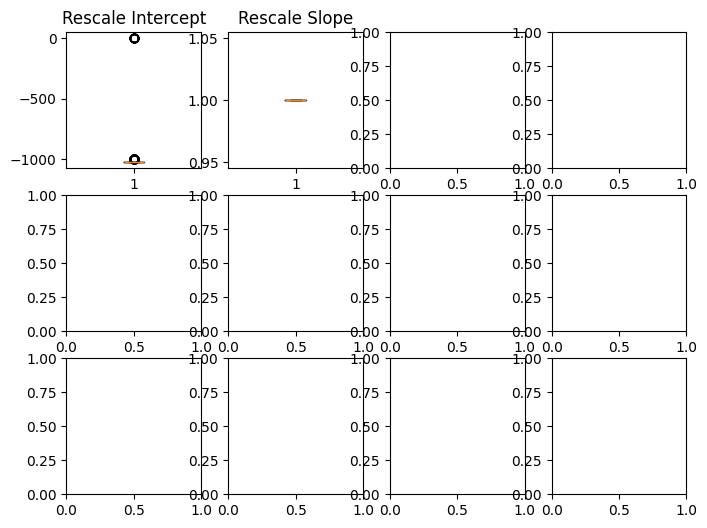

In [38]:
df = pd.DataFrame(data)

fig, axs = plt.subplots(3, 4)
fig.set_size_inches(8, 6)
axs[0, 0].boxplot(df['Rescale Intercept'])
axs[0, 0].set_title('Rescale Intercept')
axs[0, 1].boxplot(df['Rescale Slope'])
axs[0, 1].set_title('Rescale Slope')
axs[0, 2].boxplot(df['Window Center'])
axs[0, 2].set_title('Window Center')
axs[0, 3].boxplot(df['Window Width'])
axs[0, 3].set_title('Window Width')
axs[1, 0].boxplot(df['Slice Location'])
axs[1, 0].set_title('Slice Location')
axs[1, 1].boxplot(df['Slice Thickness'])
axs[1, 1].set_title('Slice Thickness')
axs[1, 2].boxplot(df['Rows'])
axs[1, 2].set_title('Rows')
axs[1, 3].boxplot(df['Columns'])
axs[1, 3].set_title('Columns')
axs[2, 0].boxplot(df['Exposure Time'])
axs[2, 0].set_title('Exposure Time')
axs[2, 1].boxplot(df['X-Ray Tube Current'])
axs[2, 1].set_title('X-Ray Tube Current')
axs[2, 2].boxplot(df['Exposure'])
axs[2, 2].set_title('Exposure')

plt.tight_layout()
plt.show()

In [ ]:
def process_single_img(ds, shape=(512, 512)):
    ds.PhotometricInterpretation = 'YBR_FULL'
    img = ds.pixel_array
    img = cv2.resize(img, shape)
    img = img - np.min(img)
    if np.max(img) != 0:
        img = img / np.max(img)
    return img

def process_single_img1(ds, shape=(512, 512)):
    if ds.PhotometricInterpretation not in ['MONOCHROME1', 'MONOCHROME2']:
        return None
    img = apply_voi_lut(ds.pixel_array, ds)
    img = cv2.resize(img, shape)
    img = img - np.min(img)
    if np.max(img) != 0:
        img = img / np.max(img)
    return img

def process_single_img2(ds, shape=(512, 512)):
    img = ds.pixel_array
    try:
        img = img * ds.RescaleSlope + ds.RescaleIntercept
    except:
        pass
    img = np.clip(img, -500, 2500).astype(float)
    img = cv2.resize(img, shape)
    img = img + 500
    img = img / 3000
    return img

def process_single_img3(ds, shape=(512, 512)):
    img = ds.pixel_array
    img = (img + 700) / 4000
    img = cv2.resize(img, shape)
    return img

In [ ]:
# blob_name = next(blob_name_list)
# print(blob_name)
blob_name = r'LIDC-IDRI-0001\01-01-2000-NA-NA-30178\3000566.000000-NA-03192/1-076.dcm'
blob_client = container_client.get_blob_client(blob_name)
blob_data = blob_client.download_blob().readall()
blob_stream = BytesIO(blob_data)
ds = dcmread(blob_stream)

# Process image using functions
img1 = process_single_img(ds)
img2 = process_img(ds)
img3 = process_single_img2(ds)
img4 = process_single_img3(ds)

# Show all three at once
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Method 1')
plt.subplot(2, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Method 2')
plt.subplot(2, 2, 3)
plt.imshow(img3, cmap='gray')
plt.title('Method 3')
plt.subplot(2, 2, 4)
plt.imshow(img4, cmap='gray')
plt.title('Method 4')
plt.tight_layout()
plt.show()

In [39]:
import cv2
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut

def process_img(ds, shape=(512, 512), window_center=None, window_width=None):
    img = ds.pixel_array
    img = cv2.resize(img, shape)

    # Apply Rescaling (if needed)
    if 'RescaleIntercept' in ds and 'RescaleSlope' in ds:
        rescale_intercept = ds.RescaleIntercept
        rescale_slope = ds.RescaleSlope
        img = img * rescale_slope + rescale_intercept

    # Apply Windowing (if specified)
    # if window_center and window_width:
        # img = apply_windowing(img, window_center, window_width)
    img = apply_windowing(img, -600, 2000)

    return img

def apply_windowing(img, window_center, window_width):
    win_min = window_center - window_width / 2.0
    win_max = window_center + window_width / 2.0
    img = np.clip(img, win_min, win_max)
    img = (img - win_min) / (win_max - win_min)
    img = np.uint8(img * 255)
    return img


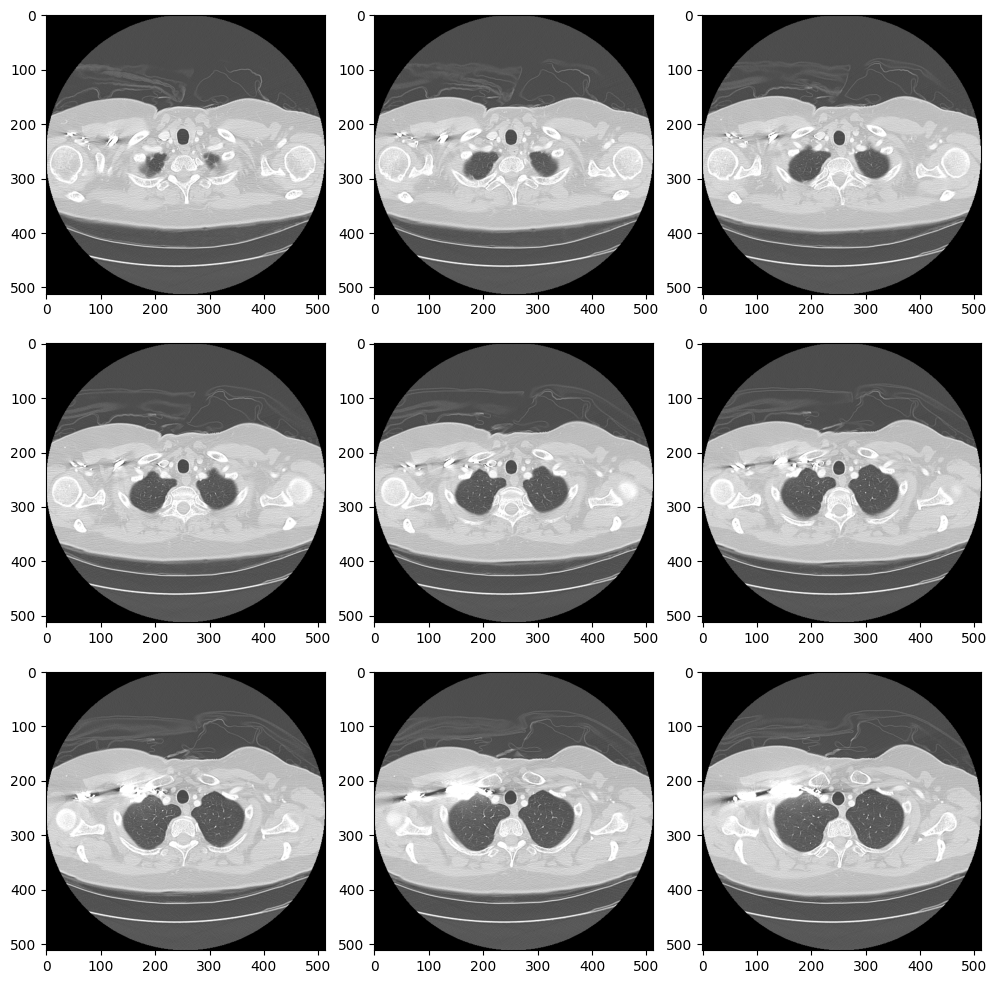

In [41]:
plt.figure(figsize=(10, 10))
for i in range(9):
    blob_name = next(blob_name_list)
    blob_client = container_client.get_blob_client(blob_name)
    blob_data = blob_client.download_blob().readall()
    blob_stream = BytesIO(blob_data)
    ds = dcmread(blob_stream)

    img = process_img(ds)
    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray')
# plt.title(str(blob_name))
plt.tight_layout()
plt.show()

In [ ]:
import pylidc as pl

pid = 'LIDC-IDRI-0001'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
ann = scan.annotations[0]
ann.visualize_in_scan()